CUDA disponible, usando GPU ...
Matriz de confusión por clases:
 tensor([[0.9793, 0.7705],
        [0.0207, 0.2295]])
mean IoU:
 tensor([0.8454, 0.2085])
Células etiquetado original:
 (54, 60) 
 Células etiquetado reescalado: 
 (55, 60)
 Células predicción:
 [901, 817]
Células etiquetado original: [60]	 Células etiquetado reescalado: [60] 	 Células predicción: 817
Matriz de confusión por clases de esta imagen: 
tensor([[[0.9785, 0.7782],
         [0.0215, 0.2218]]])
IoU de esta imagen: 
tensor([[0.8439, 0.2007]])
(86, 128, 128)


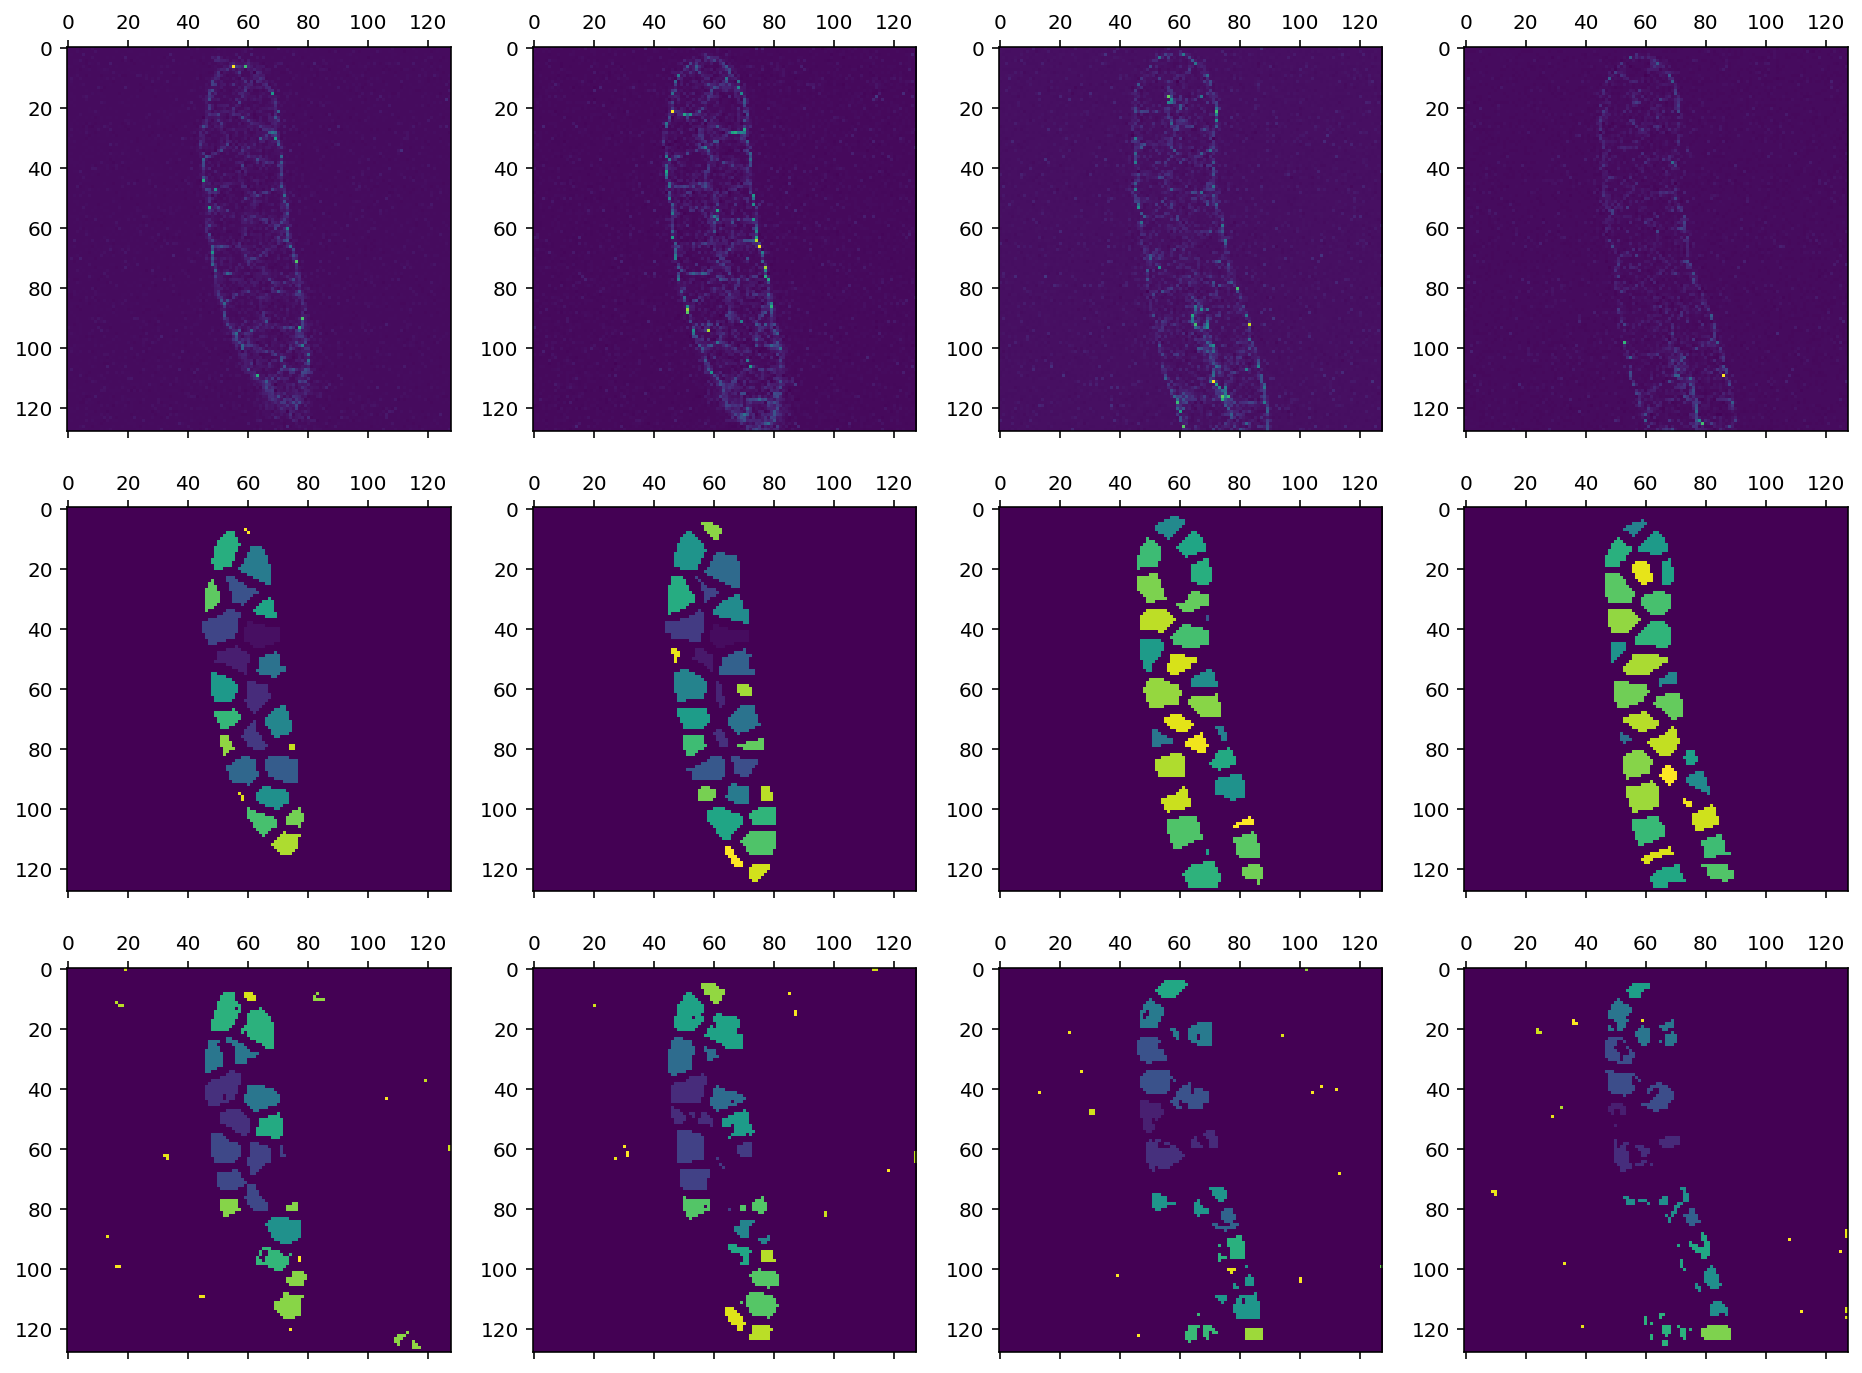

In [3]:
import sys
import torch
sys.path.insert(0, '../')
from dataset import get_test_dataset, PATHS
from models import initialize_model
from utils import metrics, compare_output, draw_images, plot_epochs

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dim_size_reduction = (1,1,1)
models_folder = "../models/"
target_mode = 'target'
gpu = torch.cuda.is_available()
model_name = "sistema_4_fullunet"
train_path = '../data/cells/0.25z 0.125x 0.125y/test/'
arch = 'UNet3D'

model = initialize_model(model_name=model_name, gpu=gpu, arch=arch, models_folder=models_folder)
data = get_test_dataset(target_mode = target_mode, dim_size_reduction = dim_size_reduction, test_path = train_path)
metrics(model, data)
pred, output = compare_output(model, 1, data, [20, 25, 45, 50])

## Pérdidas de Entrenamiento y validación

Mejor valor de validación: 0.18007159233093262	 Valor de entrenamiento: 0.14419349829355876	 iteracion: 75
 Último valor de validación: 0.18277418613433838	 Valor de entrenamiento: 0.14361630280812582	 iteracion: 99


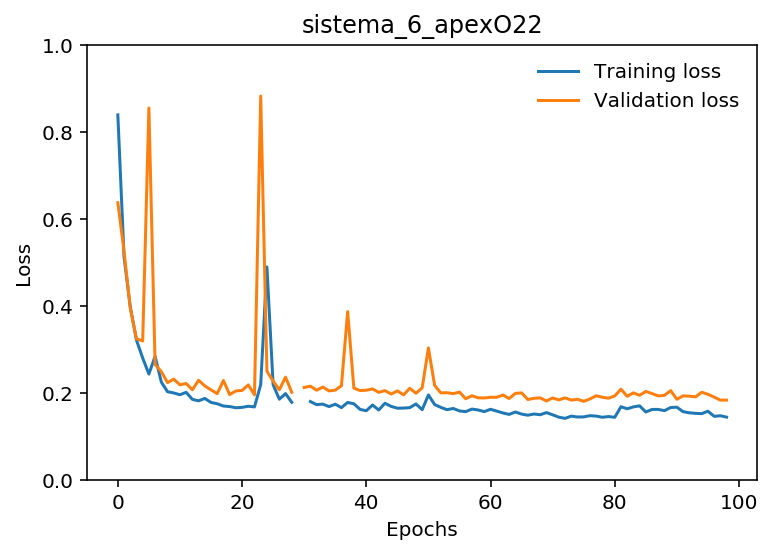

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
train_losses = torch.load(FILENAME)['train_losses']
valid_losses = torch.load(FILENAME)['valid_losses']
train_losses = train_losses[:99]
valid_losses = valid_losses[:99]
plot_epochs(train_losses, valid_losses, MODEL_NAME)
